## Exploratory Data Analysis

### Imorting the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing the Data

In [5]:
# Pandas Data Frame 
df = pd.read_csv('data/study.csv')

### Show the top 5 records

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the Dataset

In [7]:
df.shape

(1000, 8)

### Check Missing Values

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

- There are no missing values for this dataset

### Check Duplicates

In [9]:
df.duplicated().sum()

0

- There are no duplicate values in this dataset

### Check the Data Types of Features

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Get the unique values for each features

In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Check the statistics of the data

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- The mean and and standard deviation for all three numeric features are much close to each other
- The minimum value for Math is 0, then slighlty higher for Writing score - 10 and the most is for Reading - 17.

### Peek into Data Items and Fetch the Categorical and Numeric Columns into its respective list

In [35]:
cols = list(df.columns)
categorical_features = []
numeric_features = []
for col in cols:
    if 'score' not in col:
        categorical_features.append(col)
        print(f'Categories in "{col}":- \n {df[col].unique()}\n')
    else:
        numeric_features.append(col)

print('------------\n')

print(f'There are total of {len(categorical_features)} Categorical Features:- {categorical_features}')
print(f'There are total of {len(numeric_features)} Categorical Features:- {numeric_features}')


Categories in "gender":- 
 ['female' 'male']

Categories in "race/ethnicity":- 
 ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in "parental level of education":- 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in "lunch":- 
 ['standard' 'free/reduced']

Categories in "test preparation course":- 
 ['none' 'completed']

------------

There are total of 5 Categorical Features:- ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
There are total of 3 Categorical Features:- ['math score', 'reading score', 'writing score']


### Add two columns to the dataset for total and average scores

In [37]:
df['total score'] = df[numeric_features[0]] + df[numeric_features[1]] + df[numeric_features[2]] 
df['average'] = df['total score']/3                                                            
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Get the count of number of students who have scored full in all the subjects in the dataset

In [46]:
for num_col in numeric_features:
    count = df[df[num_col] == 100].count()[0]
    print(f'Number of students with full marks in {num_col.split(" ")[0].capitalize()}:- {count}')

Number of students with full marks in Math:- 7
Number of students with full marks in Reading:- 17
Number of students with full marks in Writing:- 14


### Get the count of number of students with less than or equal to 20 marks in all the subjects in the dataset

In [47]:
for num_col in numeric_features:
    count = df[df[num_col] <= 20].count()[0]
    print(f'Number of students with less than or equal to 20 marks in {num_col.split(" ")[0].capitalize()}:- {count}')

Number of students with less than or equal to 20 marks in Math:- 4
Number of students with less than or equal to 20 marks in Reading:- 1
Number of students with less than or equal to 20 marks in Writing:- 3


- Clearly, Math is a subject where students have performed the worst out of the 3.
- Also, Reading is a subject where most of them have really performed well. 

### Histogram and Kernel Distribution Function (KDE) 

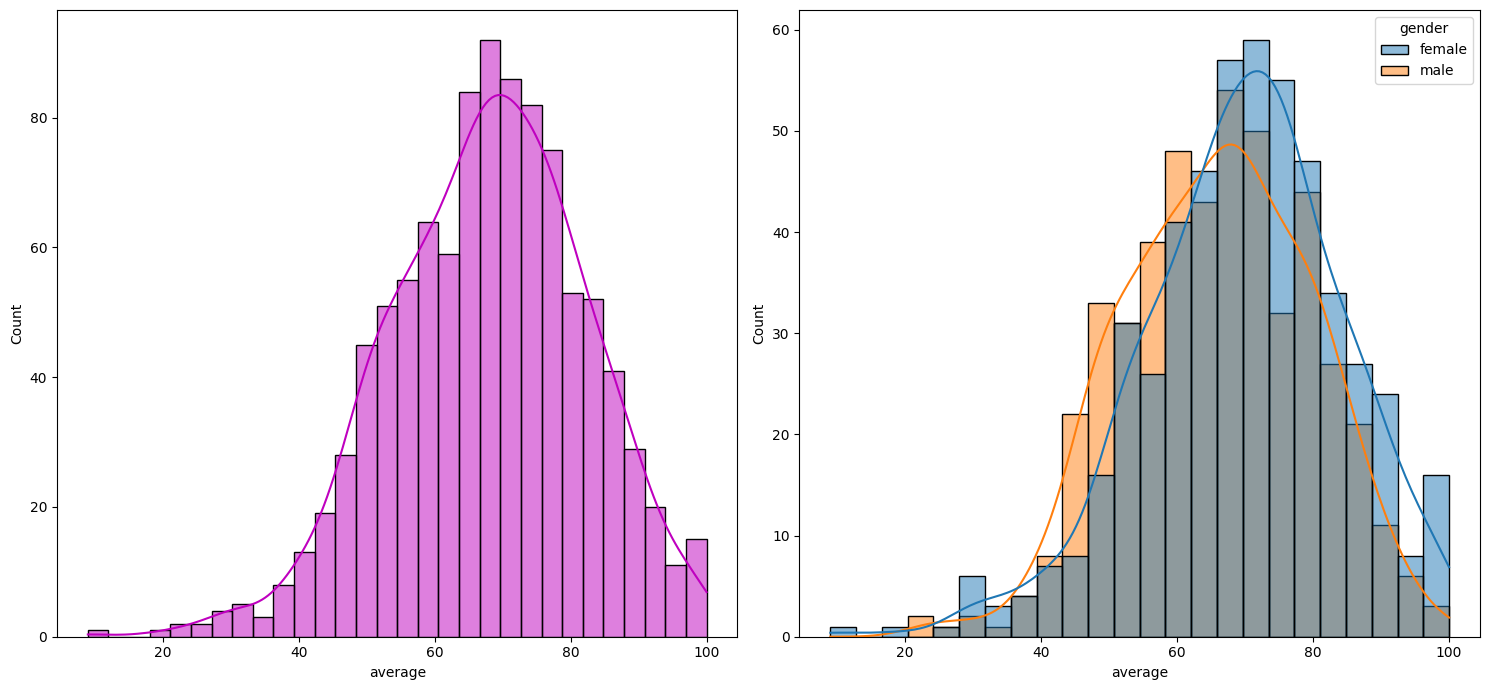

In [58]:
# Check if male or female students are performing better on average
plt.figure(figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'm')
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.tight_layout()
plt.show()

- Female students are performing better on average as compared to male students.